In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/manas/OneDrive/Documents/Fixed_cleaned_activities.csv")

# View first few rows
df.head()

,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Min. Heart Rate (bpm),...,Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall,Duration (seconds),Moving Duration (seconds),GPX Min Heart Rate,Max. Heart Rate (bpm),Average Cadence
0,1199436564,Running,01-01-2015 03:34,05-06-2016 12:48,260.36,246.600006,5.88,18.73,172.698166,100.334768,...,10,N,65,fair,no,1901,2094296,NaN,191.833686,78.659341
1,908332579,Running,24-09-2015 12:55,24-09-2015 13:16,307.23,247.000000,62.46,64.20,186.000000,115.000000,...,8,WSW,59,mostly clear,no,1275,1275,115.0,201.000000,76.747191
2,912662907,Running,28-09-2015 17:19,28-09-2015 17:39,308.37,247.000000,52.29,55.11,174.000000,70.000000,...,21,O,34,fair,no,1232,1227,70.0,199.000000,76.079365
3,1203784563,Running,07-06-2016 09:10,07-06-2016 09:42,309.47,245.399994,70.94,73.86,175.139734,99.560322,...,2,N,73,fair,no,1903,1880,NaN,194.162504,77.991701
4,1205026379,Running,09-06-2016 14:56,09-06-2016 15:17,308.59,247.000000,67.47,69.46,179.201851,100.011382,...,14,N,53,mostly clear,no,1270,1260,NaN,198.932464,77.173410


In [10]:
# Check for missing values in each column
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 GPX Min Heart Rate    64
dtype: int64


In [11]:
df.drop(columns=['GPX Min Heart Rate'], inplace=True)

In [12]:
# Check for missing values in each column
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


In [13]:
# Classify terrain based on elevation gain
def classify_terrain(elevation_gain):
    if elevation_gain < 50:
        return 'Flat'
    elif 50 <= elevation_gain < 150:
        return 'Moderate'
    else:
        return 'Hilly'

df['Terrain Type'] = df['Elevation Gain (Raw)'].apply(classify_terrain)

# Preview terrain classification
df[['Elevation Gain (Raw)', 'Terrain Type']].head(25)

,Elevation Gain (Raw),Terrain Type
0,5.88,Flat
1,62.46,Moderate
2,52.29,Moderate
3,70.94,Moderate
4,67.47,Moderate
5,51.54,Moderate
6,69.82,Moderate
7,74.06,Moderate
8,81.66,Moderate
9,70.82,Moderate


In [14]:
# Group by terrain and calculate averages
performance = df.groupby('Terrain Type')[['Average Speed', 'Average Heart Rate (bpm)', 'Average Cadence']].mean()
performance

,Average Speed,Average Heart Rate (bpm),Average Cadence
Terrain Type,,,
Flat,10.834570,167.436924,80.769145
Hilly,9.529827,173.666670,78.742184
Moderate,10.975408,175.038088,79.561197


In [15]:
performance = df.groupby('Terrain Type')[
    ['Average Speed', 'Average Heart Rate (bpm)', 'Average Cadence',
     'Duration (seconds)', 'Elevation Gain (Raw)']
].mean()
performance

,Average Speed,Average Heart Rate (bpm),Average Cadence,Duration (seconds),Elevation Gain (Raw)
Terrain Type,,,,,
Flat,10.834570,167.436924,80.769145,2035.461538,10.428462
Hilly,9.529827,173.666670,78.742184,3156.893333,257.672933
Moderate,10.975408,175.038088,79.561197,1622.089552,75.186567


In [16]:
# Define a mapping between training goals and suitable terrain types
goal_to_terrain = {
    'recovery': 'Flat',         # Easy effort on flat terrain for muscle recovery
    'endurance': 'Moderate',    # Sustained effort on mildly hilly terrain to build stamina
    'hill training': 'Hilly'    # High-intensity training on steep terrain to build strength
}

# Print the mapping to verify
print("Training Goal to Terrain Type Mapping:")
for goal, terrain in goal_to_terrain.items():
    print(f"{goal.title():<15} → {terrain}")

Training Goal to Terrain Type Mapping:
Recovery        → Flat
Endurance       → Moderate
Hill Training   → Hilly


In [17]:
# Function to recommend past runs by goal
def recommend_runs(goal):
    terrain = goal_to_terrain.get(goal.lower())
    if terrain:
        return df[df['Terrain Type'] == terrain][[
            'Begin Timestamp', 'Distance (Raw)', 'Average Speed', 'Terrain Type'
        ]]
    else:
        return f"Invalid goal. Choose from: {list(goal_to_terrain.keys())}"

# # Past Run Recommendations
print("Endurance Runs:\n", recommend_runs('endurance'))
print("\nRecovery Runs:\n", recommend_runs('recovery'))
print("\nHill Training Runs:\n", recommend_runs('hill training'))


Endurance Runs:
       Begin Timestamp  Distance (Raw)  Average Speed Terrain Type
1    24-09-2015 12:55         3.37103       9.523810     Moderate
2    28-09-2015 17:19         3.39513       9.917355     Moderate
3    07-06-2016 09:10         4.94082       9.350649     Moderate
4    09-06-2016 14:56         3.55580      10.084034     Moderate
5    11-06-2016 10:05         4.98479       9.972299     Moderate
..                ...             ...            ...          ...
93   26-02-2017 13:39         5.14983      11.111111     Moderate
94   11-03-2017 09:28         5.06357      11.285266     Moderate
98   19-03-2017 16:07         5.04683      11.650485     Moderate
110  04-05-2017 13:56         3.76345      11.076923     Moderate
112  07-05-2017 10:31         6.71703      11.538462     Moderate

[67 rows x 4 columns]

Recovery Runs:
       Begin Timestamp  Distance (Raw)  Average Speed Terrain Type
0    01-01-2015 03:34         4.96411       9.399478         Flat
36   06-08-2016 09:

In [19]:
import pandas as pd
import plotly.express as px

# Define correct GPS column names
latitude_column = 'Begin Latitude (Decimal Degrees Raw)'
longitude_column = 'Begin Longitude (Decimal Degrees Raw)'

# Drop rows with missing GPS coordinates
df = df.dropna(subset=[latitude_column, longitude_column])

# Ensure coordinates are numeric
df[latitude_column] = df[latitude_column].astype(float)
df[longitude_column] = df[longitude_column].astype(float)

# Define and apply terrain classification
def classify_terrain(elevation_gain):
    if elevation_gain < 50:
        return 'Flat'
    elif 50 <= elevation_gain < 150:
        return 'Moderate'
    else:
        return 'Hilly'

# Apply only if column is missing
df['Terrain Type'] = df['Elevation Gain (Raw)'].apply(classify_terrain)

# Create interactive map
fig = px.scatter_mapbox(
    df,
    lat=latitude_column,
    lon=longitude_column,
    color='Terrain Type',
    hover_data=['Begin Timestamp', 'Distance (Raw)', 'Average Speed'],
    zoom=11,
    height=600,
    title='Terrain Route Visualization'
)

# Set map style and display
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
fig.show()

In [20]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Select relevant features (input variables)
X = df[['Average Speed', 'Average Heart Rate (bpm)', 'Average Cadence',
        'Elevation Gain (Raw)', 'Duration (seconds)']]

# Define the target variable
y = df['Terrain Type']  # 'Flat', 'Moderate', 'Hilly'

In [22]:
# Convert text labels to numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded labels mapping:")
for cls, code in zip(le.classes_, range(len(le.classes_))):
    print(f"{cls} ➔ {code}")

Encoded labels mapping:
Flat ➔ 0
Hilly ➔ 1
Moderate ➔ 2


In [23]:
# Stratified splitting to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Decision Tree CV Accuracy: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

        Flat       1.00      1.00      1.00         3
       Hilly       1.00      1.00      1.00        15
    Moderate       1.00      1.00      1.00        13

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



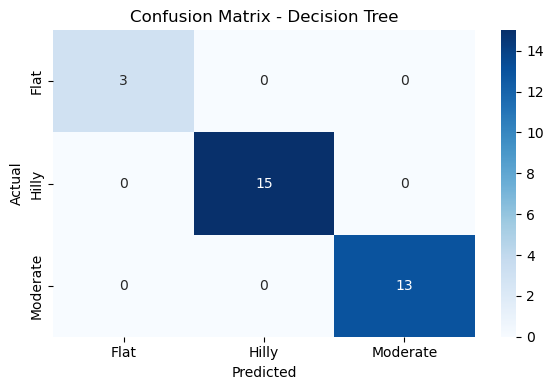

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)

# Cross-validation
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Decision Tree CV Accuracy:", dt_scores)
print("Mean Accuracy:", dt_scores.mean())

# Train and evaluate
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Random Forest CV Accuracy: [0.96 1.   0.96 1.   1.  ]
Mean Accuracy: 0.984

Random Forest Classification Report:
              precision    recall  f1-score   support

        Flat       1.00      1.00      1.00         3
       Hilly       1.00      1.00      1.00        15
    Moderate       1.00      1.00      1.00        13

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



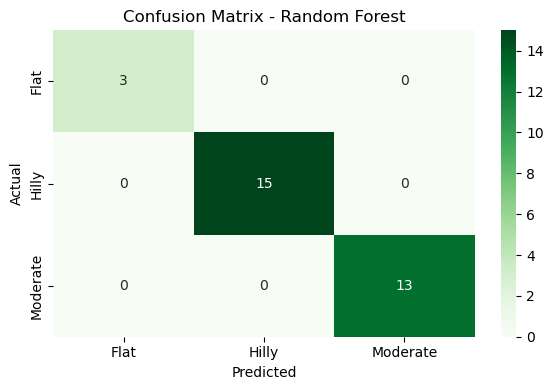

In [26]:
rf_model = RandomForestClassifier(random_state=42)

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Random Forest CV Accuracy:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Logistic Regression CV Accuracy: [1.   1.   0.92 1.   1.  ]
Mean Accuracy: 0.984

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Flat       1.00      1.00      1.00         3
       Hilly       1.00      1.00      1.00        15
    Moderate       1.00      1.00      1.00        13

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



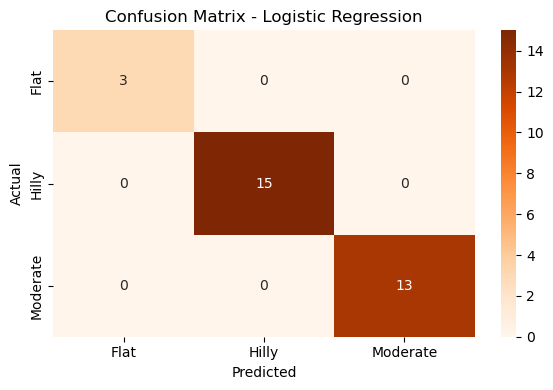

In [27]:
lr_model = LogisticRegression(max_iter=1000)

lr_scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Logistic Regression CV Accuracy:", lr_scores)
print("Mean Accuracy:", lr_scores.mean())

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [28]:
def plot_feature_importance(model, model_name, feature_names):
    plt.figure(figsize=(8, 4))

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        sns.barplot(x=importances, y=feature_names)
        plt.title(f"{model_name} - Feature Importance")

    elif hasattr(model, 'coef_'):
        importances = model.coef_[0]  # For Logistic Regression
        sns.barplot(x=importances, y=feature_names)
        plt.title(f"{model_name} - Coefficients (Feature Influence)")

    else:
        print(f"{model_name} does not support feature importance.")
        return

    plt.xlabel("Importance / Coefficient")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

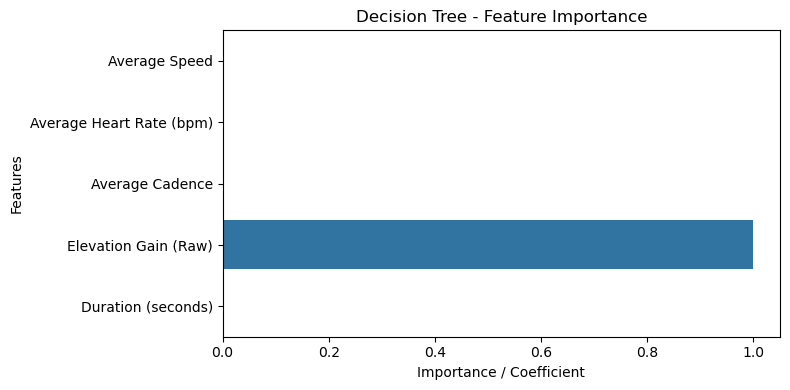

In [29]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y_encoded)
plot_feature_importance(dt_model, "Decision Tree", X.columns)

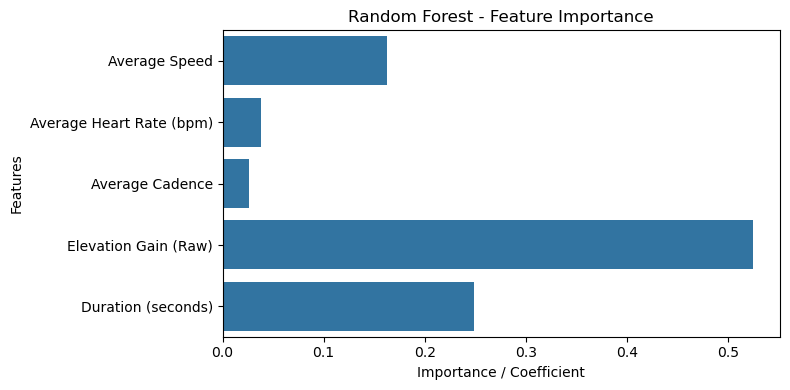

In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y_encoded)
plot_feature_importance(rf_model, "Random Forest", X.columns)

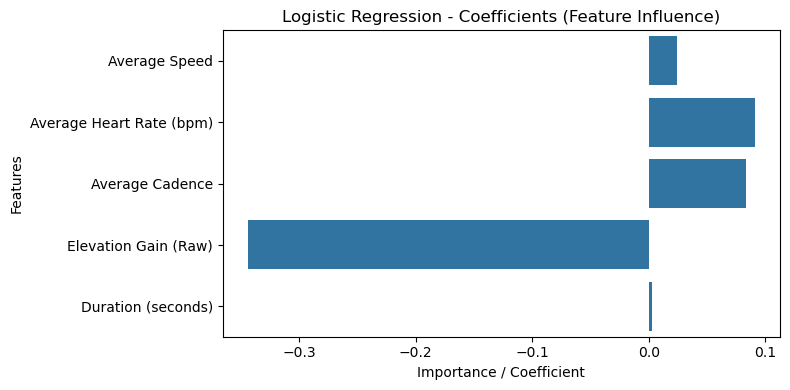

In [33]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X, y_encoded)
plot_feature_importance(lr_model, "Logistic Regression", X.columns)